In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the feature-selected data files from the previous step
X_train = pd.read_csv('X_train_final.csv')
X_test = pd.read_csv('X_test_final.csv')
y_train = pd.read_csv('y_train_final.csv').squeeze()
y_test = pd.read_csv('y_test_final.csv').squeeze()

print("Shape of training data for PCA:", X_train.shape)

Shape of training data for PCA: (17411, 12)


In [2]:
# ==============================================================================
# Step 2: Apply PCA
# ==============================================================================
# Initialize PCA. We set n_components=None to first see how much variance
# each of the possible components explains.
pca = PCA(n_components=None, random_state=42)

# Fit the PCA model on the TRAINING data only
pca.fit(X_train)

# Transform both the training and testing data using the fitted model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA transformation complete.")

PCA transformation complete.


PCA Explained Variance Summary:


,PC,Explained Variance (%),Cumulative Variance (%)
0,PC1,13.91,13.91
1,PC2,9.48,23.39
2,PC3,8.97,32.36
3,PC4,8.57,40.93
4,PC5,8.38,49.31
5,PC6,8.23,57.54
6,PC7,7.97,65.51
7,PC8,7.70,73.21
8,PC9,7.30,80.50
9,PC10,6.93,87.44


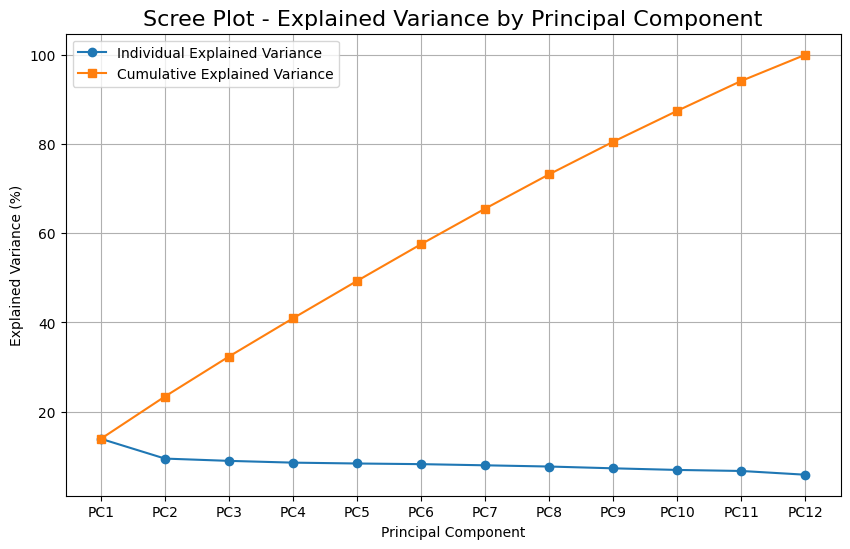

In [3]:
# ==============================================================================
# Step 3: EDA - Visualize Explained Variance with a Scree Plot
# ==============================================================================
# Calculate the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a summary DataFrame
pca_summary = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "Explained Variance (%)": explained_variance_ratio * 100,
    "Cumulative Variance (%)": cumulative_variance_ratio * 100
})

print("PCA Explained Variance Summary:")
display(pca_summary.round(2))

# Plot the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(pca_summary["PC"], pca_summary["Explained Variance (%)"], marker='o', label="Individual Explained Variance")
plt.plot(pca_summary["PC"], pca_summary["Cumulative Variance (%)"], marker='s', label="Cumulative Explained Variance")
plt.title("Scree Plot - Explained Variance by Principal Component", fontsize=16)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.legend()
plt.grid(True)
plt.show()

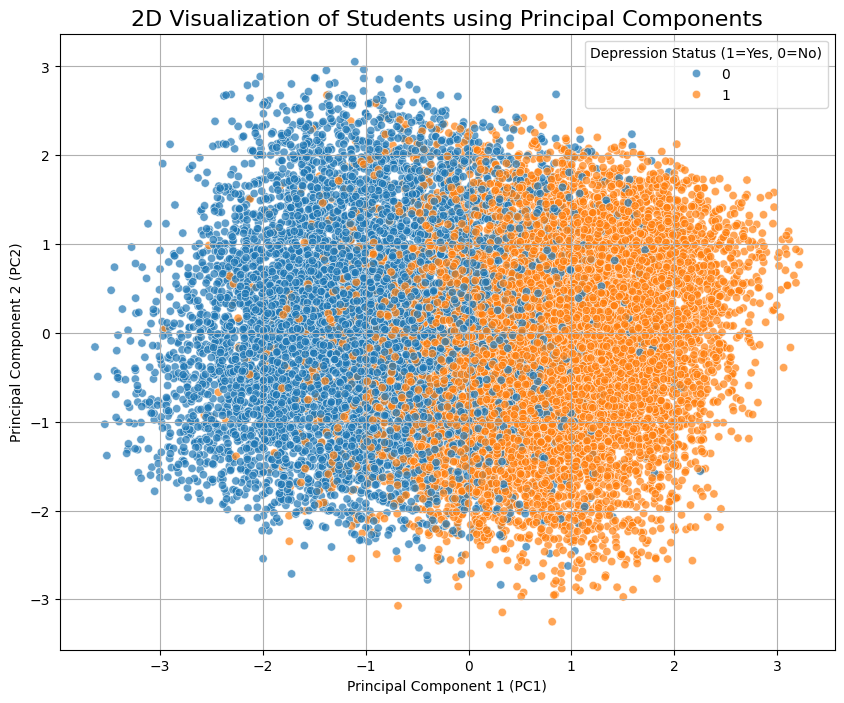

In [4]:
# ==============================================================================
# Step 4: EDA - Visualize Data in 2D PCA Space
# ==============================================================================
# Create a DataFrame for easy plotting with seaborn
df_train_pca = pd.DataFrame(data=X_train_pca[:, :2], columns=['PC1', 'PC2'])
df_train_pca['Depression'] = y_train.values # Add the target variable for coloring

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Depression', data=df_train_pca, alpha=0.7)
plt.title("2D Visualization of Students using Principal Components", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title='Depression Status (1=Yes, 0=No)')
plt.grid(True)
plt.show()